<a href="https://colab.research.google.com/github/afipolinema/PCVK_Genap_2023/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#UTS

Pada program ini dibuat untuk melihat bagaimana nilai PSNR setelah dilakukan koreksi gama dan penajaman pada gambar tumor otak

Suber data(https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# melakukan import library
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im
import glob
from math import log10, sqrt

In [4]:
def convolution2d(image, kernel, stride, padding):
# Menambahkan padding
  image = np.pad(image, padding, mode='constant', constant_values=0)
  
# Mengambil gambar dengan imput lebar dan tinggi termasuk penambahan padding
  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
  return new_image

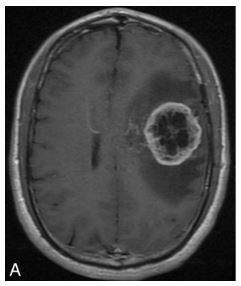

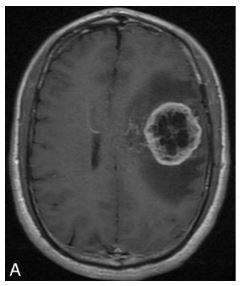

In [5]:
img = cv.imread('/content/drive/MyDrive/Week8/Y89.jpg')
#Mengubah Gambar Normal mejadi Grayscale
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

cv2_imshow(img);
cv2_imshow(img_gray);

Gamma Correction pada citra 
----------------------------------
Masukkan Nilai Gamma: 2.2


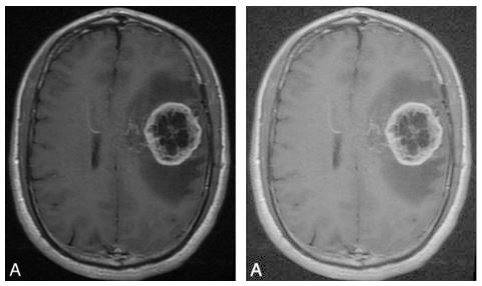

In [9]:
# pada bagian ini gambar akan dilakukan koreksi nilai gama dengan mengimputkan nilai gama
print('Gamma Correction pada citra ')
print('----------------------------------')
try:
  # saran untuk nilai gamma correction adalah 2.2 karena pada laptop nilai gamma yang tepat adalah 2.2
  gamma = float(input('Masukkan Nilai Gamma: '))
except ValueError:
  print('Error, Not a Number')

original = cv.cvtColor(img_gray,cv.COLOR_BGR2RGB)
gamma_image = np.zeros(original.shape, original.dtype)
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow(original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

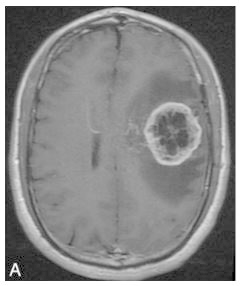

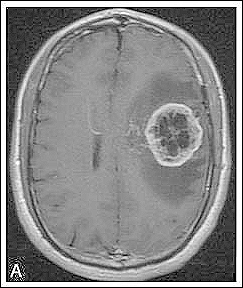

In [7]:
# image sharpen
gamma_image1 = cv.cvtColor(gamma_image,cv.COLOR_RGB2GRAY)
kernal_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

# apply gambar yang telah dilakukan gamma correction kemudian dilakukan sharpen
cv2_imshow(gamma_image)
cv2_imshow(convolution2d(gamma_image1,kernal_sharpen,1,2))

# menduplikat gambar
img4=convolution2d(gamma_image1,kernal_sharpen,1,2)

Nilai PSNR dengan pembading antara gambar gray scale setelah dilakukan gamma correction dan dipertajam adalah  9.913038707957991 (dB)


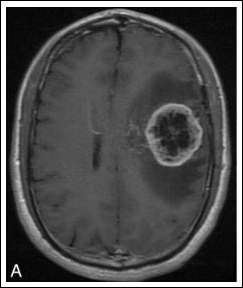

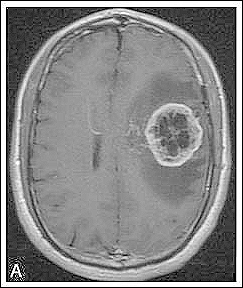

In [8]:
# memberi padding pada gambar agar ukuran gambar awal sama seperti gambar setelah dilakukan image processing
color = [0,0,0] 

top, bottom, left, right = [1]*4

img_with_border = cv.copyMakeBorder(img_gray, top, bottom, left, right, cv.BORDER_CONSTANT, value=color)


original = img_with_border
# Membuat fungsi PSNR
def PSNR(original, compressed):
  mse = np.mean((original - compressed) ** 2)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20* log10(max_pixel / sqrt(mse))
  return psnr

compressed = img4
# melakukan penghitungan nilai PSNR dengan menggunakan fungsi yang telah dibuat
psnr = PSNR(original, compressed)

print('Nilai PSNR dengan pembading antara gambar gray scale setelah dilakukan gamma correction dan dipertajam adalah ', psnr, '(dB)')
cv2_imshow(original)
cv2_imshow(img4)